In [1]:
import quandl
import pandas as pd
from matplotlib import pyplot as plt
import requests
import statsmodels.tsa.stattools as ts 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import scipy.stats as st
from numpy_ext import rolling_apply # multipler parameters
import numpy as np
import warnings
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
symbols = pd.read_csv(f"symbols.csv").symbol.tolist()
df = ((pd.concat([pd.read_csv(f"{symbol}.csv", index_col='date', parse_dates=True)
        ['close'].rename(symbol)for symbol in symbols],axis=1,sort=True)))
df = df.loc[:,~df.columns.duplicated()]
df.head()

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,ONEUSDT,...,ZECUSDT,IOSTUSDT,CELRUSDT,DASHUSDT,OMGUSDT,THETAUSDT,ENJUSDT,MITHUSDT,MATICUSDT,ATOMUSDT
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7200.85,130.77,13.7184,8.850,41.62,1.603,0.03348,0.19305,2.6039,0.00466,...,28.07,0.004817,0.00362,41.84,0.6214,0.08656,0.07963,0.00757,0.01496,4.380
2020-01-02,6965.71,127.19,13.0105,8.462,39.43,1.533,0.03269,0.18750,2.4593,0.00470,...,27.02,0.004605,0.00340,40.04,0.5950,0.08443,0.07371,0.00699,0.01467,4.096
2020-01-03,7344.96,134.35,13.6474,8.888,42.23,1.629,0.03417,0.19338,2.6396,0.00478,...,28.41,0.004819,0.00355,43.92,0.6248,0.08771,0.07800,0.00739,0.01512,4.237
2020-01-04,7354.11,134.20,13.8092,9.077,42.78,1.642,0.03434,0.19305,2.6481,0.00475,...,29.91,0.004869,0.00355,46.19,0.6246,0.09394,0.07720,0.00728,0.01484,4.250
2020-01-05,7358.75,135.37,14.0532,9.020,43.30,1.631,0.03460,0.19453,2.6865,0.00466,...,30.81,0.004916,0.00349,51.17,0.6367,0.09421,0.07637,0.00734,0.01483,4.200


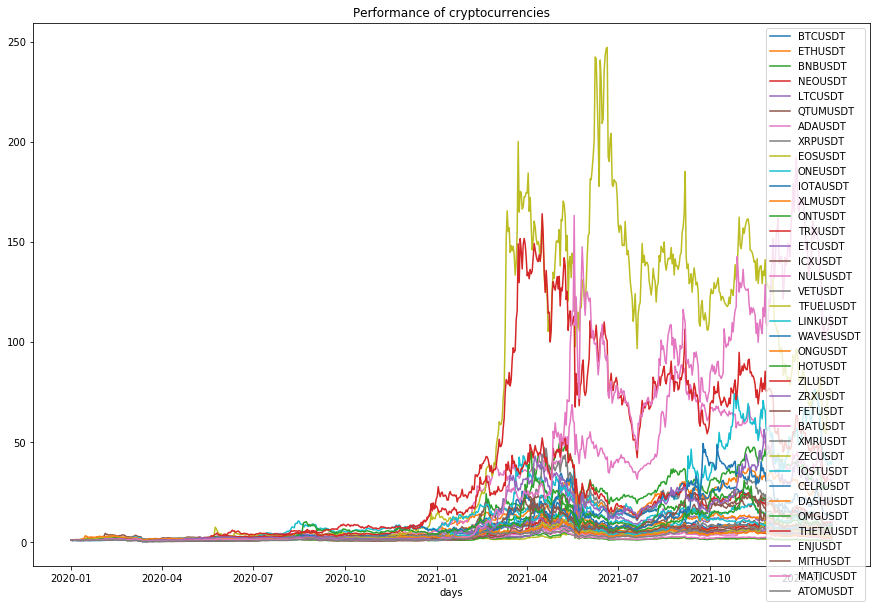

ETHUSDT and BNBUSDT: p-value = 0.03979705332444611
ETHUSDT and FETUSDT: p-value = 0.00929444623247325
ETHUSDT and ATOMUSDT: p-value = 0.023721913440312492
BNBUSDT and ETHUSDT: p-value = 0.041843271809026326
BNBUSDT and ONEUSDT: p-value = 0.017484822695047256
BNBUSDT and TFUELUSDT: p-value = 0.03356023967788732
BNBUSDT and ONGUSDT: p-value = 0.017847752585666694
BNBUSDT and HOTUSDT: p-value = 0.03491978636054878
BNBUSDT and FETUSDT: p-value = 0.046052060336596534
BNBUSDT and CELRUSDT: p-value = 0.018390725167988134
BNBUSDT and ENJUSDT: p-value = 0.023781731733975086
BNBUSDT and MATICUSDT: p-value = 0.03810752895361327
NEOUSDT and TFUELUSDT: p-value = 0.00016846197375098098
NEOUSDT and HOTUSDT: p-value = 0.01848294455288712
NEOUSDT and ZILUSDT: p-value = 0.0259578421031618
NEOUSDT and THETAUSDT: p-value = 2.6834950126713157e-07
LTCUSDT and BTCUSDT: p-value = 0.03861984946462694
LTCUSDT and IOTAUSDT: p-value = 0.019048489602640894
LTCUSDT and XLMUSDT: p-value = 0.00039515054718914207
LTCU

WAVESUSDT and TRXUSDT: p-value = 0.011169728777207297
WAVESUSDT and VETUSDT: p-value = 0.01568392369144123
WAVESUSDT and TFUELUSDT: p-value = 0.00163230740311893
WAVESUSDT and ONGUSDT: p-value = 8.89782203659704e-05
WAVESUSDT and HOTUSDT: p-value = 0.006923414180555499
WAVESUSDT and FETUSDT: p-value = 0.0023848624756069073
WAVESUSDT and OMGUSDT: p-value = 0.042239187944367554
WAVESUSDT and THETAUSDT: p-value = 0.019079190315282886
ONGUSDT and ETHUSDT: p-value = 0.03418164222454857
ONGUSDT and BNBUSDT: p-value = 0.009574291195622784
ONGUSDT and QTUMUSDT: p-value = 0.022383863688808445
ONGUSDT and ADAUSDT: p-value = 0.009979372077112796
ONGUSDT and XRPUSDT: p-value = 0.005212552926376693
ONGUSDT and IOTAUSDT: p-value = 0.03279373127168102
ONGUSDT and TRXUSDT: p-value = 0.0018682625614576144
ONGUSDT and VETUSDT: p-value = 0.0014384162716002884
ONGUSDT and TFUELUSDT: p-value = 0.03851453444051624
ONGUSDT and WAVESUSDT: p-value = 0.00010944247282060756
ONGUSDT and HOTUSDT: p-value = 0.00988

MITHUSDT and THETAUSDT: p-value = 0.0006217928037544444
MATICUSDT and BNBUSDT: p-value = 0.03431794557039613
MATICUSDT and ONEUSDT: p-value = 0.032746298468652416
MATICUSDT and CELRUSDT: p-value = 0.037815414702902714
ATOMUSDT and ETHUSDT: p-value = 0.014003139677686622
ATOMUSDT and ONEUSDT: p-value = 0.0030698077520654433
ATOMUSDT and FETUSDT: p-value = 0.03033057537430442
ATOMUSDT and BATUSDT: p-value = 0.023245696792688435
ATOMUSDT and CELRUSDT: p-value = 0.01721653317572093
ATOMUSDT and ENJUSDT: p-value = 0.0074358629487091725


In [3]:
norm_prices = df.divide(df.iloc[0])

plt.figure(figsize = (15, 10))
plt.plot(norm_prices)
plt.xlabel('days')
plt.title('Performance of cryptocurrencies')
plt.legend(symbols)
plt.show()

result_list = []
for a1 in df.columns:
    for a2 in df.columns:
        if a1 != a2:
            test_result = ts.coint(df[a1], df[a2])
            if test_result[1] < 0.05:
                print(a1 + ' and ' + a2 + ': p-value = ' + str(test_result[1]))
                result_list.append((a1, a2, test_result[1]))

In [4]:
## 等金額
import statsmodels.formula.api as sm
import statsmodels.tsa.stattools as ts

def z_score(yport):
    zscore = (yport[-1]  - yport.mean()) / yport.std()
    return zscore

def forwardStopLoss(ANewPrice, BNewPrice, aPos, bPos):
    """(0,2)"""
    pass

def backwardStopLoss(ANewPrice, BNewPrice, aPos, bPos):
    """(0,-2)"""
    pass

def stopLossForward(ANewPrice, BNewPrice, aPos, bPos):
    """(2, 0)"""
    pass

def stopLossBackward(ANewPrice, BNewPrice, aPos, bPos):
    """(-2, 0)"""
    pass

def backwardForward(ANewPrice, BNewPrice, aPos, bPos):
    """(-2, 2)"""
    pass

def forwardBackward(ANewPrice, BNewPrice, aPos, bPos):
    """(2, -2)"""
    pass

def forwardBackwardEntry(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (2, -1)
    long B 
    short A  
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += -aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
def backwardForwardEntry(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-2, 1)
    long A 
    short B    
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += -bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice

def forwardStopLossEntry(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (2,1)
    long A 
    short B    
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += -aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice

def backwardStopLossEntry(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-2,-1)
    long B 
    short A    
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += -bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
def forwardEntryToStopLoss(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (1, 2)
    long A 
    short B
    close the position
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (ANewPrice - AOldOrderPrice + AOldOrderPrice) 
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BOldOrderPrice - BNewPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position']  
    init = balanceDict['A']['available'] + balanceDict['B']['available']
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice  
    
def backwardEntryToStopLoss(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-1,-2)
    long B 
    short A
    close the position  
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (AOldOrderPrice - ANewPrice + AOldOrderPrice)
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BNewPrice - BOldOrderPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position'] 
    init = balanceDict['A']['available'] + balanceDict['B']['available']
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice 
    
def upToOut(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (1,0)
    long A 
    short B
    close the position
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (ANewPrice - AOldOrderPrice + AOldOrderPrice) 
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BOldOrderPrice - BNewPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position']  
    init = balanceDict['A']['available'] + balanceDict['B']['available']
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice    
    
def upToDown(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (1,-1)
    long A 
    short B
    close the position
    long B 
    short A
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (ANewPrice - AOldOrderPrice + AOldOrderPrice) 
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BOldOrderPrice - BNewPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position']  
    init = balanceDict['A']['available'] + balanceDict['B']['available'] 
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice     

#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += -bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
def outToUp(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (0,1)
    long A 
    short B
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += -aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
def outToDown(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (0,-1)
    long B 
    short A
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += -bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
def downToOut(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-1,0)
    long B 
    short A
    close the position
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (AOldOrderPrice - ANewPrice + AOldOrderPrice)
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BNewPrice - BOldOrderPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position'] 
    init = balanceDict['A']['available'] + balanceDict['B']['available']
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
def downToUp(ANewPrice, BNewPrice, aPos, bPos):
    """
    statusList = (-1,1)
    long B 
    short A
    close the position
    long A 
    short B
    """
    global init
    global AOldOrderPrice
    global BOldOrderPrice
    balanceDict['A']['available'] += abs(balanceDict['A']['position']) * (AOldOrderPrice - ANewPrice + AOldOrderPrice)
    balanceDict['A']['position'] -= balanceDict['A']['position']
    balanceDict['B']['available'] += abs(balanceDict['B']['position']) * (BNewPrice - BOldOrderPrice + BOldOrderPrice)
    balanceDict['B']['position'] -= balanceDict['B']['position'] 
    init = balanceDict['A']['available'] + balanceDict['B']['available']  
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice
    
#     aTotal = init/(abs(aPos) + abs(bPos))
#     bTotal = aTotal * abs(bPos)
    aTotal, bTotal = init/2, init/2
    balanceDict['A']['available'] -=  aTotal
    balanceDict['A']['position'] += -aTotal/ANewPrice
    balanceDict['B']['available'] -= bTotal
    balanceDict['B']['position'] += bTotal/BNewPrice
    init -=(aTotal + bTotal)
    AOldOrderPrice = ANewPrice
    BOldOrderPrice = BNewPrice


strategy = {(1,0): upToOut, 
            (1,-1):upToDown,
            (0,1): outToUp,
            (0,-1):outToDown,
            (-1,0):downToOut,
            (-1,1):downToUp, 
            (0,2): forwardStopLoss, 
            (0,-2): backwardStopLoss, 
            (2,1) : forwardStopLossEntry,
            (-2,-1) : backwardStopLossEntry, 
            (1, 2) : forwardEntryToStopLoss, 
            (-1,-2) : backwardEntryToStopLoss, 
            (2, 0) : stopLossForward, 
            (-2, 0) : stopLossBackward, 
            (-2, 2) : backwardForward, 
            (2, -2) : forwardBackward, 
            (2, -1) : forwardBackwardEntry, 
            (-2, 1) : backwardForwardEntry}    

# stop limit

[pair trade]ETHUSDT-BNBUSDT 0.12179935%
[pair trade]ETHUSDT-FETUSDT 13.17686303%
[pair trade]ETHUSDT-ATOMUSDT -5.92823383%
[pair trade]BNBUSDT-ETHUSDT -7.72908620%
[pair trade]BNBUSDT-ONEUSDT -32.84542599%
[pair trade]BNBUSDT-TFUELUSDT 86.30617272%
[pair trade]BNBUSDT-ONGUSDT -94.31851451%
[pair trade]BNBUSDT-HOTUSDT 99.66977627%
[pair trade]BNBUSDT-FETUSDT -4.78158316%
[pair trade]BNBUSDT-CELRUSDT 17.86508005%
[pair trade]BNBUSDT-ENJUSDT 35.84260211%
[pair trade]BNBUSDT-MATICUSDT 102.02242003%
[pair trade]NEOUSDT-TFUELUSDT 47.15471963%
[pair trade]NEOUSDT-HOTUSDT 73.67040244%
[pair trade]NEOUSDT-ZILUSDT 20.66005196%
[pair trade]NEOUSDT-THETAUSDT -31.86101930%
[pair trade]LTCUSDT-BTCUSDT 2.53419312%
[pair trade]LTCUSDT-IOTAUSDT -16.16037041%
[pair trade]LTCUSDT-XLMUSDT 29.33907644%
[pair trade]LTCUSDT-LINKUSDT -13.34806811%
[pair trade]LTCUSDT-HOTUSDT 9.26789582%
[pair trade]LTCUSDT-DASHUSDT -7.95168102%
[pair trade]LTCUSDT-THETAUSDT 66.03636236%
[pair trade]QTUMUSDT-XRPUSDT -59.822356

[pair trade]HOTUSDT-FETUSDT -10.34682428%
[pair trade]HOTUSDT-XMRUSDT 29.18299991%
[pair trade]HOTUSDT-ZECUSDT 15.36988703%
[pair trade]HOTUSDT-IOSTUSDT -37.14585718%
[pair trade]HOTUSDT-CELRUSDT -48.86936570%
[pair trade]HOTUSDT-DASHUSDT -10.26812941%
[pair trade]HOTUSDT-MITHUSDT -32.66778334%
[pair trade]ZILUSDT-XLMUSDT 19.01200459%
[pair trade]ZILUSDT-ZRXUSDT 3.49637439%
[pair trade]ZILUSDT-DASHUSDT -46.50189094%
[pair trade]ZRXUSDT-LTCUSDT 25.63968484%
[pair trade]ZRXUSDT-IOTAUSDT 9.75667732%
[pair trade]ZRXUSDT-XLMUSDT 24.79301602%
[pair trade]ZRXUSDT-NULSUSDT 3.29225593%
[pair trade]ZRXUSDT-LINKUSDT -30.53449710%
[pair trade]ZRXUSDT-ZILUSDT -3.56281084%
[pair trade]ZRXUSDT-ZECUSDT -13.25572460%
[pair trade]ZRXUSDT-DASHUSDT -38.96689514%
[pair trade]FETUSDT-ETHUSDT 14.01806517%
[pair trade]FETUSDT-BNBUSDT -1.24845126%
[pair trade]FETUSDT-QTUMUSDT 32.48309268%
[pair trade]FETUSDT-ADAUSDT 66.26715181%
[pair trade]FETUSDT-XRPUSDT -18.56141785%
[pair trade]FETUSDT-TRXUSDT -34.52459631

<Figure size 432x288 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

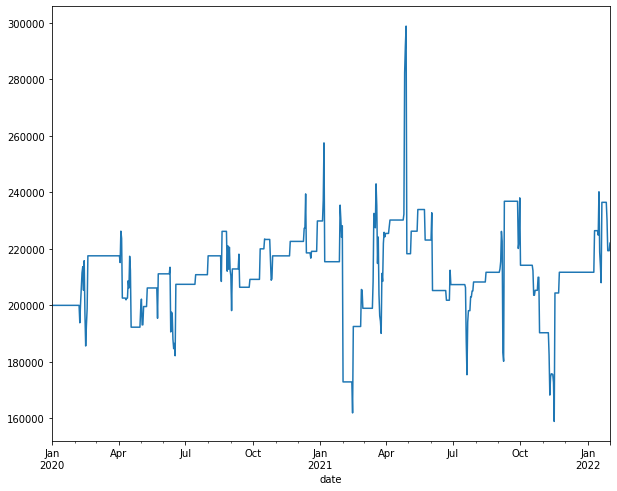

In [7]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)
symb = []
performance = []
for i in result_list:
    A_symbol, B_symbol = i[0], i[1]
#     A_symbol, B_symbol = 'ETHUSDT', 'BNBUSDT'
    init = 200000
    pastStatus = 0
    AOldOrderPrice = None
    BOldOrderPrice = None
    aEntryPriceList, bEntryPriceList = [], []
    lookback = 20

    balanceDict = {'A':{'available': 100000, 'position':0}, 'B':{'available': 100000, 'position':0}}
    entryZscore = 1 
    exitZscore = 0.2 # take profit
    stopLoss = 1.2
    #     miniSpread = 0.01
    df1 = df[[A_symbol, B_symbol]]
    df1['ratio'] = df1[A_symbol]/df1[B_symbol]
    df1['zscore'] = rolling_apply(z_score, 20, df1['ratio'])
    history = pd.DataFrame()
    statusList = []
    pl = []
    date, A_available, A_position, B_available, B_position, Balance, initList, A_price, B_price= [], [], [], [], [], [], [], [], []
    for index, row in df1.iterrows():
        currStatus = 0 if (pastStatus == 1 and row['zscore'] < -exitZscore) or (pastStatus == -1 and row['zscore'] > exitZscore) else 1 if (pastStatus == 1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) and row['zscore'] < stopLoss else 2 if row['zscore'] > stopLoss else -1 if (pastStatus == -1 and row['zscore'] < -exitZscore or row['zscore'] < -entryZscore) and row['zscore'] > -stopLoss else -2 if row['zscore'] < -stopLoss else 0
    #     currStatus = 0 if (pastStatus == 1 and row['zscore'] > -exitZscore) or (pastStatus == -1 and row['zscore'] < exitZscore) else 1 if (pastStatus == 1 and row['zscore'] < -exitZscore or row['zscore'] < -entryZscore) and row['zscore'] > -stopLoss else 2 if (pastStatus == 2 and row['zscore'] < -stopLoss or row['zscore'] < -stopLoss) else -1 if (pastStatus == -1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) and row['zscore'] < stopLoss else -2 if (pastStatus == -2 and row['zscore'] > stopLoss or row['zscore'] > stopLoss) else 0
    #     currStatus = 0 if (pastStatus == 1 and row['zscore'] > -exitZscore) or (pastStatus == -1 and row['zscore'] < exitZscore) else 1 if (pastStatus == 1 and row['zscore'] < -exitZscore or row['zscore'] < -entryZscore) else -1 if (pastStatus == -1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) else 0
        con = (pastStatus, currStatus)
        if pastStatus != currStatus:
            strategy[con](row[A_symbol], row[B_symbol], currStatus, row['ratio'], )
            AOldOrderPrice, BOldOrderPrice = row[A_symbol], row[B_symbol]
            aEntryPriceList.append(AOldOrderPrice)
            bEntryPriceList.append(BOldOrderPrice)
        else:
            aEntryPriceList.append(0)
            bEntryPriceList.append(0)
        pastStatus = currStatus
        statusList.append(currStatus)

        date.append(index)
        initList.append(init)
        A_price.append(row[A_symbol])
        B_price.append(row[B_symbol])
        A_available.append(balanceDict['A']['available'])
        A_position.append(balanceDict['A']['position'])
        B_available.append(balanceDict['B']['available'])
        B_position.append(balanceDict['B']['position'])
        Balance.append(balanceDict['A']['available'] + balanceDict['B']['available'])
    #     print('date: ', index, 'balanceDict:', balanceDict)
    np.set_printoptions(suppress=True)
    history['date'] = date
    history['statusList'] = statusList
    history['zscore'] = df1['zscore'].tolist()
    history['{}_position'.format(A_symbol)] = A_position
    history['{}_price'.format(A_symbol)] = A_price
    #     history['{}_total'.format(A_symbol)] = abs(history['{}_position'.format(A_symbol)]) * history['{}_price'.format(A_symbol)]
    history['{}_position'.format(B_symbol)] = B_position
    history['{}_price'.format(B_symbol)] = B_price
    #     history['{}_total'.format(B_symbol)] = abs(history['{}_position'.format(B_symbol)]) * history['{}_price'.format(B_symbol)]
    # history['balance'] = history['{}_available'.format(A_symbol)] + (abs(history['{}_position'.format(A_symbol)]) * history['{}_price'.format(A_symbol)]) + history['{}_available'.format(B_symbol)] + (abs(history['{}_position'.format(B_symbol)]) * history['{}_price'.format(B_symbol)])
    ## 初始本金
    history['init'] = [200000]* history.shape[0] 
    ## 帳面收入
    history['total_asset'] = initList + (abs(history['{}_position'.format(A_symbol)]) * history['{}_price'.format(A_symbol)]) + (abs(history['{}_position'.format(B_symbol)]) * history['{}_price'.format(B_symbol)])
    ## 損益
    history['pnl'] = history['total_asset'] - history['init'] 
    history['return'] = history['pnl']/history['init'] + 1
    history = history.set_index(['date'])

    # print(history['return'])
    print('[pair trade]{}-{} {}%'.format(A_symbol, B_symbol, "{:.8f}".format((history['return'].iloc[-1] -1) * 100)))
    symb.append('{}-{}'.format(A_symbol, B_symbol))
    performance.append("{:.8f}".format((history['return'].iloc[-1] -1) * 100))
    plt.clf()
    plt.figure(figsize=(10,8))
    # history['total_asset'].plot()
    history['total_asset'].plot.line()
#     plt.show()
    plt.savefig("chart/{}-{}".format(A_symbol, B_symbol))
    history.to_csv('process/{}_{}.csv'.format(A_symbol, B_symbol))
perf = pd.DataFrame({'symbol' : symb, 'performance': performance})
perf.to_csv('performance.csv')

# original ratio

In [ ]:
pd.set_option('display.float_format', lambda x: '%.8f' % x)

for i in result_list:
    A_symbol, B_symbol = i[0], i[1]
# A_symbol, B_symbol = 'BTCUSDT', 'ETHUSDT'
    init = 100000
    pastStatus = 0
    AOldOrderPrice = None
    BOldOrderPrice = None
    aEntryPriceList, bEntryPriceList = [], []
    lookback = 20

    balanceDict = {'A':{'available': 100000, 'position':0}, 'B':{'available': 100000, 'position':0}}
    entryZscore = 1.5 
    exitZscore = 0.5 # take profit
    stopLoss = 2
    #     miniSpread = 0.01
    df1 = df[[A_symbol, B_symbol]]

    hedgeRatio=np.full(df1.shape[0], 0.0)

    df1['ratio'] = df1[A_symbol]/df1[B_symbol]
    df1['zscore'] = rolling_apply(z_score, 20, df1['ratio'])

    history_original = pd.DataFrame()
    statusList = []
    pl = []
    date, A_available, A_position, B_available, B_position, init, Balance , A_price, B_price= [], [], [], [], [], [], [], [], []
    for index, row in df1.iterrows():
    #     currStatus = 0 if (pastStatus == 1 and row['zscore'] > -exitZscore) or (pastStatus == -1 and row['zscore'] < exitZscore) else 1 if (pastStatus == 1 and row['zscore'] < -exitZscore or row['zscore'] < -entryZscore) and row['zscore'] > -stopLoss else 2 if (pastStatus == 2 and row['zscore'] < -stopLoss or row['zscore'] < -stopLoss) else -1 if (pastStatus == -1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) and row['zscore'] < stopLoss else -2 if (pastStatus == -2 and row['zscore'] > stopLoss or row['zscore'] > stopLoss) else 0
        currStatus = 0 if (pastStatus == 1 and row['zscore'] > -exitZscore) or (pastStatus == -1 and row['zscore'] < exitZscore) else 1 if (pastStatus == 1 and row['zscore'] < -exitZscore or row['zscore'] < -entryZscore) else -1 if (pastStatus == -1 and row['zscore'] > exitZscore or row['zscore'] > entryZscore) else 0
        con = (pastStatus, currStatus)
        if pastStatus != currStatus:
            strategy[con](row[A_symbol], row[B_symbol], currStatus, row['ratio'], )
            AOldOrderPrice, BOldOrderPrice = row[A_symbol], row[B_symbol]
            aEntryPriceList.append(AOldOrderPrice)
            bEntryPriceList.append(BOldOrderPrice)
        else:
            aEntryPriceList.append(0)
            bEntryPriceList.append(0)
        pastStatus = currStatus
        statusList.append(currStatus)

        date.append(index)
        A_price.append(row[A_symbol])
        B_price.append(row[B_symbol])
        A_available.append(balanceDict['A']['available'])
        A_position.append(balanceDict['A']['position'])
        B_available.append(balanceDict['B']['available'])
        B_position.append(balanceDict['B']['position'])
        Balance.append(balanceDict['A']['available'] + balanceDict['B']['available'])
    #     print('date: ', index, 'balanceDict:', balanceDict)
    np.set_printoptions(suppress=True)
    history_original['date'] = date
    history_original['statusList'] = statusList
    history_original['{}_available'.format(A_symbol)] = A_available
    history_original['{}_position'.format(A_symbol)] = A_position
    history_original['{}_price'.format(A_symbol)] = A_price
    history_original['{}_available'.format(B_symbol)] = B_available
    history_original['{}_position'.format(B_symbol)] = B_position
    history_original['{}_price'.format(B_symbol)] = B_price
    history_original['init'] = [200000]* history_original.shape[0]
    history_original['balance'] = history_original['{}_available'.format(A_symbol)] + (abs(history_original['{}_position'.format(A_symbol)]) * history_original['{}_price'.format(A_symbol)]) + history_original['{}_available'.format(B_symbol)] + (abs(history_original['{}_position'.format(B_symbol)]) * history_original['{}_price'.format(B_symbol)])
    history_original['pnl'] = history_original['balance'] - history_original['init']
    history_original['return'] = history_original['balance']/200000 -1
    #     history.to_csv("pair_trade_ratio/{}-{}_ratio.xls".format(A_symbol, B_symbol))
    #     print(history_original['return'])
    print('[pair trade]{}-{} {}%'.format(A_symbol, B_symbol, "{:.8f}".format(history_original['return'].iloc[-1] * 100)))
    plt.clf()
    plt.figure(figsize=(10,8))
    history_original['return'].plot()
    plt.show()
        #     plt.savefig("pair_trade_ratio/{}-{}_ratio".format(A_symbol, B_symbol))